#### Lesson: Covariance Stationary Processes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import quantecon as qe

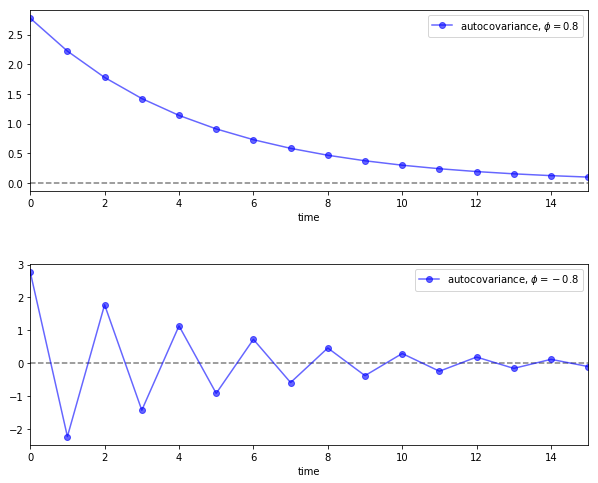

In [2]:
num_rows, num_cols = 2, 1
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 8))
plt.subplots_adjust(hspace=0.4)

for i, ϕ in enumerate((0.8, -0.8)):
    ax = axes[i]
    times = list(range(16))
    acov = [ϕ**k / (1 - ϕ**2) for k in times]
    ax.plot(times, acov, 'bo-', alpha=0.6,
            label=f'autocovariance, $\phi = {ϕ:.2}$')
    ax.legend(loc='upper right')
    ax.set(xlabel='time', xlim=(0, 15))
    ax.hlines(0, 0, 15, linestyle='--', alpha=0.5)
plt.show()

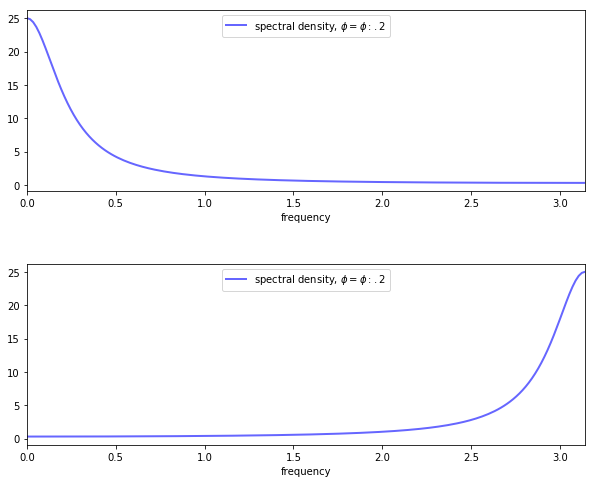

In [3]:
def ar1_sd(ϕ, ω):
    return 1 / (1 - 2 * ϕ * np.cos(ω) + ϕ**2)

ωs = np.linspace(0, np.pi, 180)
num_rows, num_cols = 2, 1
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 8))
plt.subplots_adjust(hspace=0.4)

# Autocovariance when phi = 0.8
for i, ϕ in enumerate((0.8, -0.8)):
    ax = axes[i]
    sd = ar1_sd(ϕ, ωs)
    ax.plot(ωs, sd, 'b-', alpha=0.6, lw=2,
            label='spectral density, $\phi = {ϕ:.2}$')
    ax.legend(loc='upper center')
    ax.set(xlabel='frequency', xlim=(0, np.pi))
plt.show()

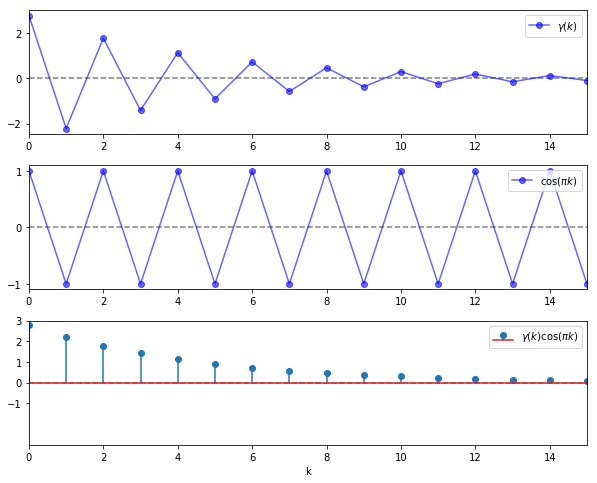

In [4]:
ϕ = -0.8
times = list(range(16))
y1 = [ϕ**k / (1 - ϕ**2) for k in times]
y2 = [np.cos(np.pi * k) for k in times]
y3 = [a * b for a, b in zip(y1, y2)]

num_rows, num_cols = 3, 1
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 8))
plt.subplots_adjust(hspace=0.25)

# Autocovariance when ϕ = -0.8
ax = axes[0]
ax.plot(times, y1, 'bo-', alpha=0.6, label='$\gamma(k)$')
ax.legend(loc='upper right')
ax.set(xlim=(0, 15), yticks=(-2, 0, 2))
ax.hlines(0, 0, 15, linestyle='--', alpha=0.5)

# Cycles at frequency π
ax = axes[1]
ax.plot(times, y2, 'bo-', alpha=0.6, label='$\cos(\pi k)$')
ax.legend(loc='upper right')
ax.set(xlim=(0, 15), yticks=(-1, 0, 1))
ax.hlines(0, 0, 15, linestyle='--', alpha=0.5)

# Product
ax = axes[2]
ax.stem(times, y3, label='$\gamma(k) \cos(\pi k)$')
ax.legend(loc='upper right')
ax.set(xlim=(0, 15), ylim=(-3, 3), yticks=(-1, 0, 1, 2, 3))
ax.hlines(0, 0, 15, linestyle='--', alpha=0.5)
ax.set_xlabel("k")

plt.show()

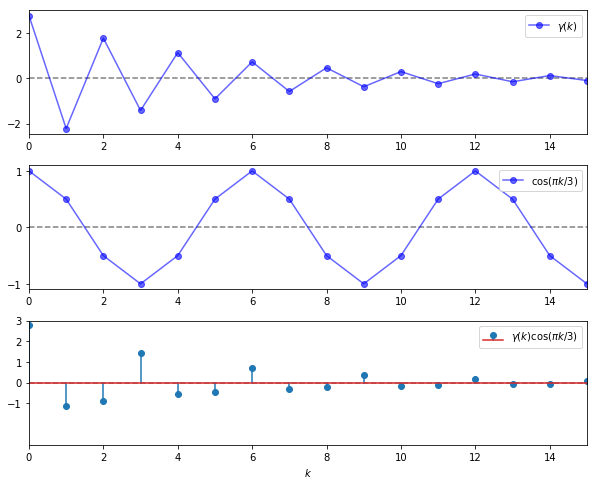

In [5]:
ϕ = -0.8
times = list(range(16))
y1 = [ϕ**k / (1 - ϕ**2) for k in times]
y2 = [np.cos(np.pi * k/3) for k in times]
y3 = [a * b for a, b in zip(y1, y2)]

num_rows, num_cols = 3, 1
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 8))
plt.subplots_adjust(hspace=0.25)

# Autocovariance when phi = -0.8
ax = axes[0]
ax.plot(times, y1, 'bo-', alpha=0.6, label='$\gamma(k)$')
ax.legend(loc='upper right')
ax.set(xlim=(0, 15), yticks=(-2, 0, 2))
ax.hlines(0, 0, 15, linestyle='--', alpha=0.5)

# Cycles at frequency π
ax = axes[1]
ax.plot(times, y2, 'bo-', alpha=0.6, label='$\cos(\pi k/3)$')
ax.legend(loc='upper right')
ax.set(xlim=(0, 15), yticks=(-1, 0, 1))
ax.hlines(0, 0, 15, linestyle='--', alpha=0.5)

# Product
ax = axes[2]
ax.stem(times, y3, label='$\gamma(k) \cos(\pi k/3)$')
ax.legend(loc='upper right')
ax.set(xlim=(0, 15), ylim=(-3, 3), yticks=(-1, 0, 1, 2, 3))
ax.hlines(0, 0, 15, linestyle='--', alpha=0.5)
ax.set_xlabel("$k$")

plt.show()

In [6]:
def plot_impulse_response(arma, ax=None):
    if ax is None:
        ax = plt.gca()
    yi = arma.impulse_response()
    ax.stem(list(range(len(yi))), yi)
    ax.set(xlim=(-0.5), ylim=(min(yi)-0.1, max(yi)+0.1),
                 title='Impulse response', xlabel='time', ylabel='response')
    return ax

def plot_spectral_density(arma, ax=None):
    if ax is None:
        ax = plt.gca()
    w, spect = arma.spectral_density(two_pi=False)
    ax.semilogy(w, spect)
    ax.set(xlim=(0, np.pi), ylim=(0, np.max(spect)),
           title='Spectral density', xlabel='frequency', ylabel='spectrum')
    return ax

def plot_autocovariance(arma, ax=None):
    if ax is None:
        ax = plt.gca()
    acov = arma.autocovariance()
    ax.stem(list(range(len(acov))), acov)
    ax.set(xlim=(-0.5, len(acov) - 0.5), title='Autocovariance',
           xlabel='time', ylabel='autocovariance')
    return ax

def plot_simulation(arma, ax=None):
    if ax is None:
        ax = plt.gca()
    x_out = arma.simulation()
    ax.plot(x_out)
    ax.set(title='Sample path', xlabel='time', ylabel='state space')
    return ax

def quad_plot(arma):
    """
    Plots the impulse response, spectral_density, autocovariance,
    and one realization of the process.

    """
    num_rows, num_cols = 2, 2
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
    plot_functions = [plot_impulse_response,
                      plot_spectral_density,
                      plot_autocovariance,
                      plot_simulation]
    for plot_func, ax in zip(plot_functions, axes.flatten()):
        plot_func(arma, ax)
    plt.tight_layout()
    plt.show()

D:\programs\Anaconda\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
D:\programs\Anaconda\lib\site-packages\matplotlib\axes\_base.py:3507: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  self.set_ylim(upper, lower, auto=None)
D:\programs\Anaconda\lib\site-packages\matplotlib\artist.py:913: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  return func(v)
D:\programs\Anaconda\lib\site-packages\matplotlib\transforms.py:954: ComplexWarning: Casting complex values to real discards the imaginary part
  self._points[:, 1] = interval


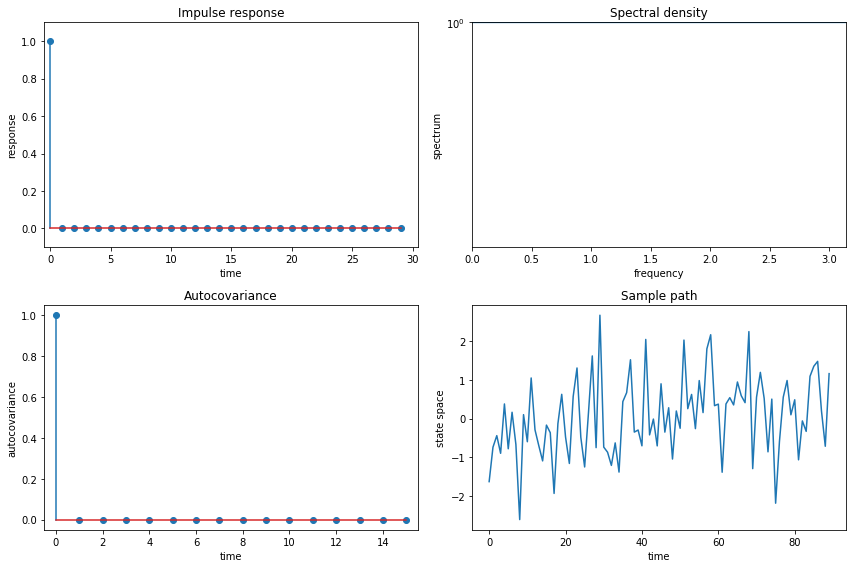

In [7]:
ϕ = 0.0
θ = 0.0
arma = qe.ARMA(ϕ, θ)
quad_plot(arma)

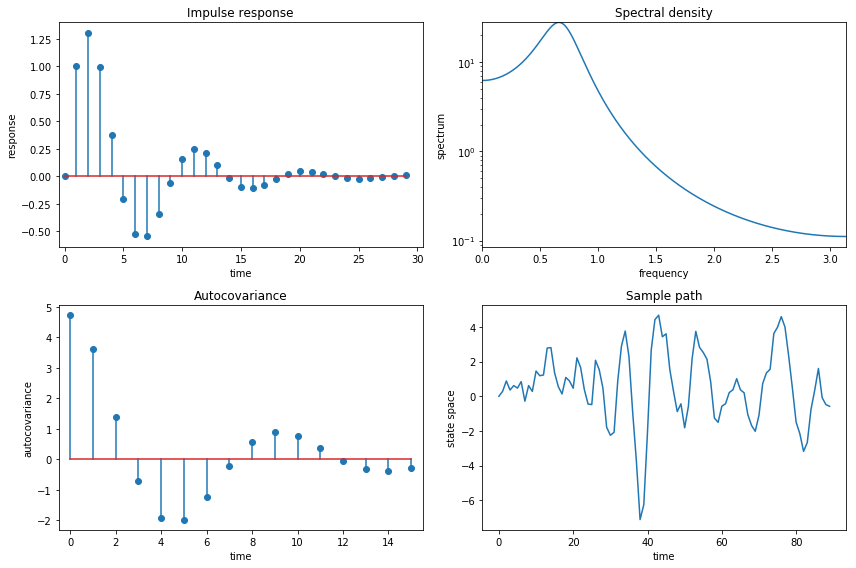

In [8]:
ϕ = 1.3, -.7
θ = 0.0
arma = qe.ARMA(ϕ, θ)
quad_plot(arma)

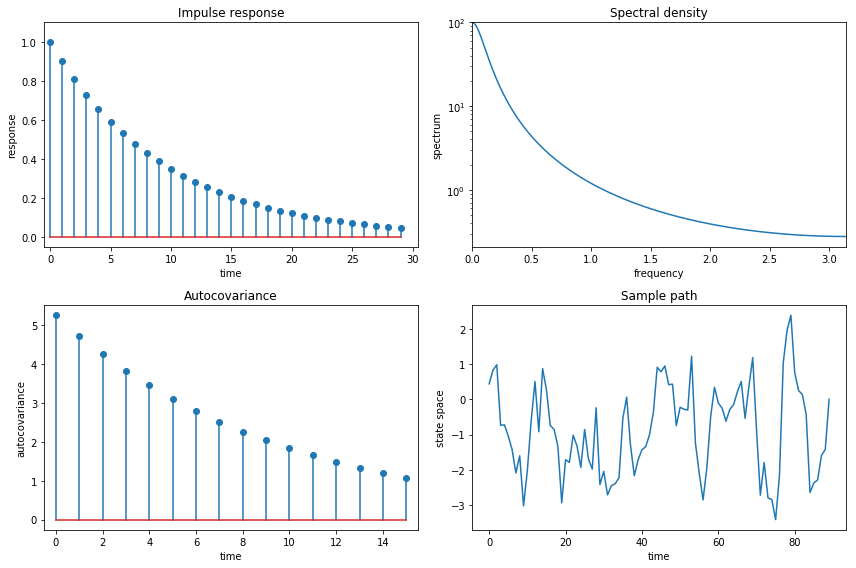

In [9]:
ϕ = 0.9
θ = -0.0
arma = qe.ARMA(ϕ, θ)
quad_plot(arma)

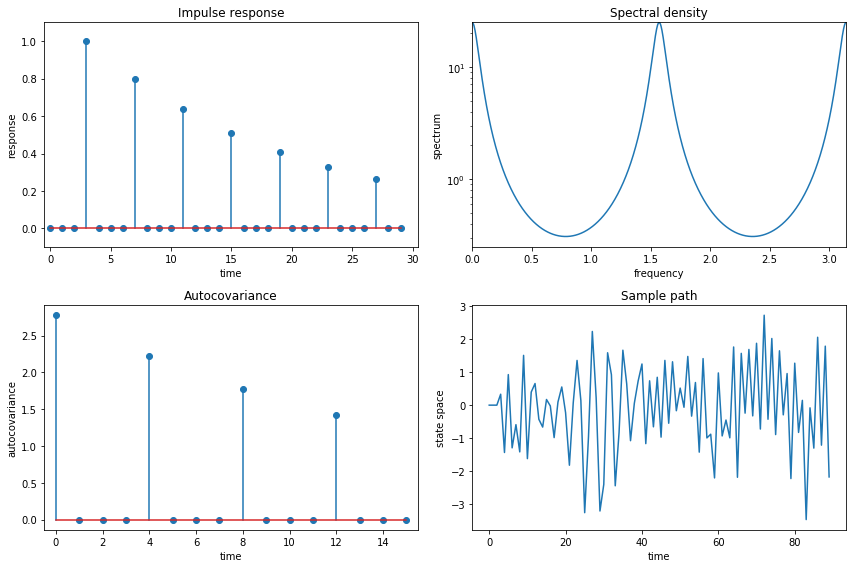

In [10]:
ϕ = 0., 0., 0., .8
θ = -0.0
arma = qe.ARMA(ϕ, θ)
quad_plot(arma)

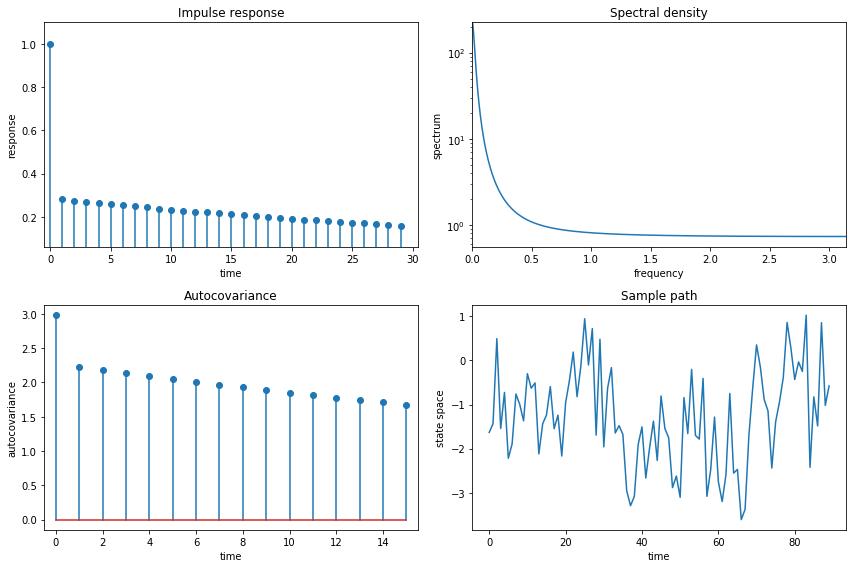

In [11]:
ϕ = .98
θ = -0.7
arma = qe.ARMA(ϕ, θ)
quad_plot(arma)

#### Lesson: Estimation of Spectra

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from quantecon import ARMA, periodogram, ar_periodogram

D:\programs\Anaconda\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


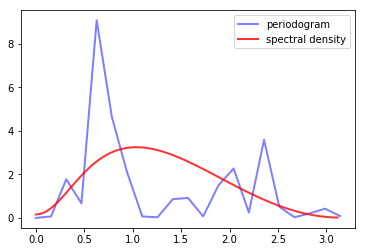

In [2]:
n = 40                          # Data size
ϕ, θ = 0.5, (0, -0.8)           # AR and MA parameters
lp = ARMA(ϕ, θ)
X = lp.simulation(ts_length=n)

fig, ax = plt.subplots()
x, y = periodogram(X)
ax.plot(x, y, 'b-', lw=2, alpha=0.5, label='periodogram')
x_sd, y_sd = lp.spectral_density(two_pi=False, res=120)
ax.plot(x_sd, y_sd, 'r-', lw=2, alpha=0.8, label='spectral density')
ax.legend()
plt.show()

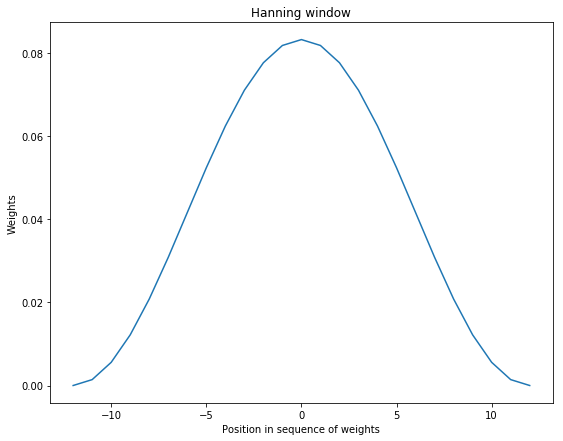

In [3]:
def hanning_window(M):
    w = [0.5 - 0.5 * np.cos(2 * np.pi * n/(M-1)) for n in range(M)]
    return w

window = hanning_window(25) / np.abs(sum(hanning_window(25)))
x = np.linspace(-12, 12, 25)
fig, ax = plt.subplots(figsize=(9, 7))
ax.plot(x, window)
ax.set_title("Hanning window")
ax.set_ylabel("Weights")
ax.set_xlabel("Position in sequence of weights")
plt.show()

Exercise 1

![Ex1](img/estspec_1.png)

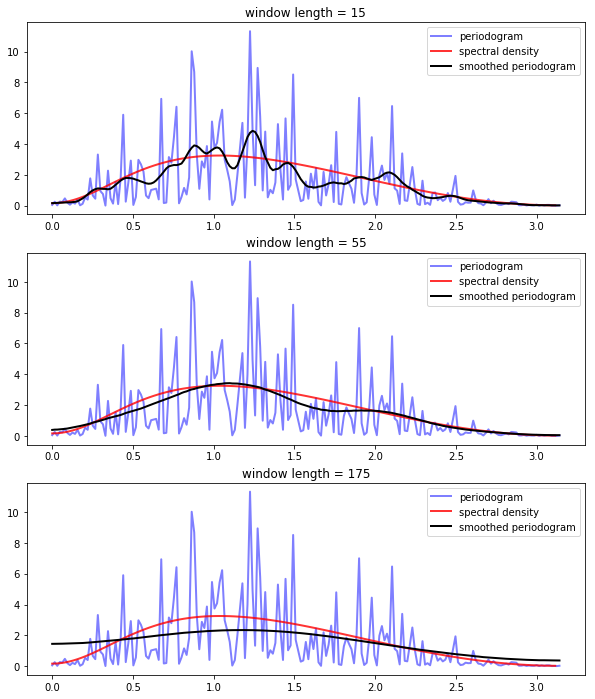

In [4]:
## Data
n = 400
ϕ = 0.5
θ = 0, -0.8
lp = ARMA(ϕ, θ)
X = lp.simulation(ts_length=n)

fig, ax = plt.subplots(3, 1, figsize=(10, 12))

for i, wl in enumerate((15, 55, 175)):  # Window lengths

    x, y = periodogram(X)
    ax[i].plot(x, y, 'b-', lw=2, alpha=0.5, label='periodogram')

    x_sd, y_sd = lp.spectral_density(two_pi=False, res=120)
    ax[i].plot(x_sd, y_sd, 'r-', lw=2, alpha=0.8, label='spectral density')

    x, y_smoothed = periodogram(X, window='hamming', window_len=wl)
    ax[i].plot(x, y_smoothed, 'k-', lw=2, label='smoothed periodogram')

    ax[i].legend()
    ax[i].set_title(f'window length = {wl}')
plt.show()

Exercise 2

![Ex2](img/estspec_2.png)

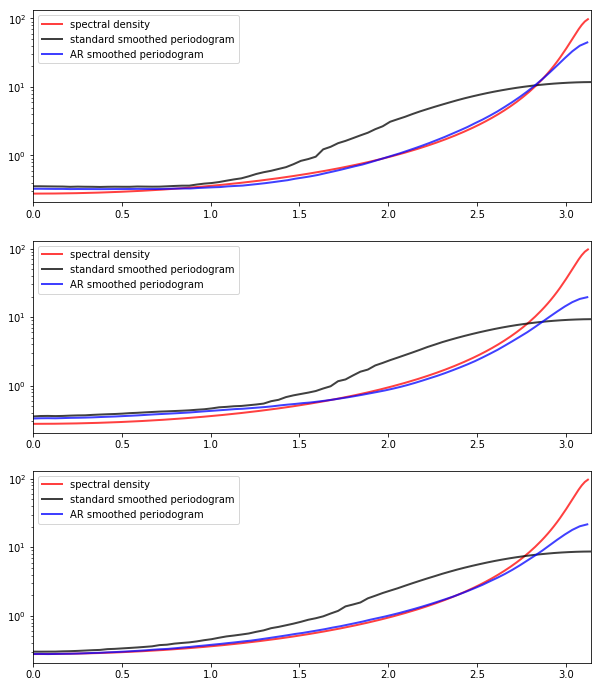

In [5]:
lp = ARMA(-0.9)
wl = 65


fig, ax = plt.subplots(3, 1, figsize=(10,12))

for i in range(3):
    X = lp.simulation(ts_length=150)
    ax[i].set_xlim(0, np.pi)

    x_sd, y_sd = lp.spectral_density(two_pi=False, res=180)
    ax[i].semilogy(x_sd, y_sd, 'r-', lw=2, alpha=0.75,
        label='spectral density')

    x, y_smoothed = periodogram(X, window='hamming', window_len=wl)
    ax[i].semilogy(x, y_smoothed, 'k-', lw=2, alpha=0.75,
        label='standard smoothed periodogram')

    x, y_ar = ar_periodogram(X, window='hamming', window_len=wl)
    ax[i].semilogy(x, y_ar, 'b-', lw=2, alpha=0.75,
        label='AR smoothed periodogram')

    ax[i].legend(loc='upper left')
plt.show()

#### Lesson: Additive and Multiplicative Functionals

In [1]:
import numpy as np
import scipy as sp
import scipy.linalg as la
import quantecon as qe
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm, lognorm

In [2]:
"""
@authors: Chase Coleman, Balint Szoke, Tom Sargent

"""

class AMF_LSS_VAR:
    """
    This class transforms an additive (multiplicative)
    functional into a QuantEcon linear state space system.
    """

    def __init__(self, A, B, D, F=None, ν=None):
        # Unpack required elements
        self.nx, self.nk = B.shape
        self.A, self.B = A, B

        # Checking the dimension of D (extended from the scalar case)
        if len(D.shape) > 1 and D.shape[0] != 1:
            self.nm = D.shape[0]
            self.D = D
        elif len(D.shape) > 1 and D.shape[0] == 1:
            self.nm = 1
            self.D = D
        else:
            self.nm = 1
            self.D = np.expand_dims(D, 0)

        # Create space for additive decomposition
        self.add_decomp = None
        self.mult_decomp = None

        # Set F
        if not np.any(F):
            self.F = np.zeros((self.nk, 1))
        else:
            self.F = F

        # Set ν
        if not np.any(ν):
            self.ν = np.zeros((self.nm, 1))
        elif type(ν) == float:
            self.ν = np.asarray([[ν]])
        elif len(ν.shape) == 1:
            self.ν = np.expand_dims(ν, 1)
        else:
            self.ν = ν

        if self.ν.shape[0] != self.D.shape[0]:
            raise ValueError("The dimension of ν is inconsistent with D!")

        # Construct BIG state space representation
        self.lss = self.construct_ss()

    def construct_ss(self):
        """
        This creates the state space representation that can be passed
        into the quantecon LSS class.
        """
        # Pull out useful info
        nx, nk, nm = self.nx, self.nk, self.nm
        A, B, D, F, ν = self.A, self.B, self.D, self.F, self.ν
        if self.add_decomp:
            ν, H, g = self.add_decomp
        else:
            ν, H, g = self.additive_decomp()

        # Auxiliary blocks with 0's and 1's to fill out the lss matrices
        nx0c = np.zeros((nx, 1))
        nx0r = np.zeros(nx)
        nx1 = np.ones(nx)
        nk0 = np.zeros(nk)
        ny0c = np.zeros((nm, 1))
        ny0r = np.zeros(nm)
        ny1m = np.eye(nm)
        ny0m = np.zeros((nm, nm))
        nyx0m = np.zeros_like(D)

        # Build A matrix for LSS
        # Order of states is: [1, t, xt, yt, mt]
        A1 = np.hstack([1, 0, nx0r, ny0r, ny0r])         # Transition for 1
        A2 = np.hstack([1, 1, nx0r, ny0r, ny0r])         # Transition for t
        # Transition for x_{t+1}
        A3 = np.hstack([nx0c, nx0c, A, nyx0m.T, nyx0m.T])
        # Transition for y_{t+1}
        A4 = np.hstack([ν, ny0c, D, ny1m, ny0m])
        # Transition for m_{t+1}
        A5 = np.hstack([ny0c, ny0c, nyx0m, ny0m, ny1m])
        Abar = np.vstack([A1, A2, A3, A4, A5])

        # Build B matrix for LSS
        Bbar = np.vstack([nk0, nk0, B, F, H])

        # Build G matrix for LSS
        # Order of observation is: [xt, yt, mt, st, tt]
        # Selector for x_{t}
        G1 = np.hstack([nx0c, nx0c, np.eye(nx), nyx0m.T, nyx0m.T])
        G2 = np.hstack([ny0c, ny0c, nyx0m, ny1m, ny0m])   # Selector for y_{t}
        # Selector for martingale
        G3 = np.hstack([ny0c, ny0c, nyx0m, ny0m, ny1m])
        G4 = np.hstack([ny0c, ny0c, -g, ny0m, ny0m])  # Selector for stationary
        G5 = np.hstack([ny0c, ν, nyx0m, ny0m, ny0m])  # Selector for trend
        Gbar = np.vstack([G1, G2, G3, G4, G5])

        # Build H matrix for LSS
        Hbar = np.zeros((Gbar.shape[0], nk))

        # Build LSS type
        x0 = np.hstack([1, 0, nx0r, ny0r, ny0r])
        S0 = np.zeros((len(x0), len(x0)))
        lss = qe.lss.LinearStateSpace(Abar, Bbar, Gbar, Hbar, mu_0=x0, Sigma_0=S0)

        return lss

    def additive_decomp(self):
        """
        Return values for the martingale decomposition
            - ν     : unconditional mean difference in Y
            - H     : coefficient for the (linear) martingale component (κ_a)
            - g     : coefficient for the stationary component g(x)
            - Y_0   : it should be the function of X_0 (for now set it to 0.0)
        """
        I = np.identity(self.nx)
        A_res = la.solve(I - self.A, I)
        g = self.D @ A_res
        H = self.F + self.D @ A_res @ self.B

        return self.ν, H, g

    def multiplicative_decomp(self):
        """
        Return values for the multiplicative decomposition (Example 5.4.4.)
            - ν_tilde  : eigenvalue
            - H        : vector for the Jensen term
        """
        ν, H, g = self.additive_decomp()
        ν_tilde = ν + (.5)*np.expand_dims(np.diag(H @ H.T), 1)

        return ν_tilde, H, g

    def loglikelihood_path(self, x, y):
        A, B, D, F = self.A, self.B, self.D, self.F
        k, T = y.shape
        FF = F @ F.T
        FFinv = la.inv(FF)
        temp = y[:, 1:] - y[:, :-1] - D @ x[:, :-1]
        obs =  temp * FFinv * temp
        obssum = np.cumsum(obs)
        scalar = (np.log(la.det(FF)) + k*np.log(2*np.pi))*np.arange(1, T)

        return -(.5)*(obssum + scalar)

    def loglikelihood(self, x, y):
        llh = self.loglikelihood_path(x, y)

        return llh[-1]


    def plot_additive(self, T, npaths=25, show_trend=True):
        """
        Plots for the additive decomposition

        """
        # Pull out right sizes so we know how to increment
        nx, nk, nm = self.nx, self.nk, self.nm

        # Allocate space (nm is the number of additive functionals -
        # we want npaths for each)
        mpath = np.empty((nm*npaths, T))
        mbounds = np.empty((nm*2, T))
        spath = np.empty((nm*npaths, T))
        sbounds = np.empty((nm*2, T))
        tpath = np.empty((nm*npaths, T))
        ypath = np.empty((nm*npaths, T))

        # Simulate for as long as we wanted
        moment_generator = self.lss.moment_sequence()
        # Pull out population moments
        for t in range (T):
            tmoms = next(moment_generator)
            ymeans = tmoms[1]
            yvar = tmoms[3]

            # Lower and upper bounds - for each additive functional
            for ii in range(nm):
                li, ui = ii*2, (ii+1)*2
                madd_dist = norm(ymeans[nx+nm+ii],
                                 np.sqrt(yvar[nx+nm+ii, nx+nm+ii]))
                mbounds[li:ui, t] = madd_dist.ppf([0.01, .99])

                sadd_dist = norm(ymeans[nx+2*nm+ii],
                                 np.sqrt(yvar[nx+2*nm+ii, nx+2*nm+ii]))
                sbounds[li:ui, t] = sadd_dist.ppf([0.01, .99])

        # Pull out paths
        for n in range(npaths):
            x, y = self.lss.simulate(T)
            for ii in range(nm):
                ypath[npaths*ii+n, :] = y[nx+ii, :]
                mpath[npaths*ii+n, :] = y[nx+nm + ii, :]
                spath[npaths*ii+n, :] = y[nx+2*nm + ii, :]
                tpath[npaths*ii+n, :] = y[nx+3*nm + ii, :]

        add_figs = []

        for ii in range(nm):
            li, ui = npaths*(ii), npaths*(ii+1)
            LI, UI = 2*(ii), 2*(ii+1)
            add_figs.append(self.plot_given_paths(T,
                                                  ypath[li:ui,:],
                                                  mpath[li:ui,:],
                                                  spath[li:ui,:],
                                                  tpath[li:ui,:],
                                                  mbounds[LI:UI,:],
                                                  sbounds[LI:UI,:],
                                                  show_trend=show_trend))

            add_figs[ii].suptitle(f'Additive decomposition of $y_{ii+1}$',
                                  fontsize=14)

        return add_figs


    def plot_multiplicative(self, T, npaths=25, show_trend=True):
        """
        Plots for the multiplicative decomposition

        """
        # Pull out right sizes so we know how to increment
        nx, nk, nm = self.nx, self.nk, self.nm
        # Matrices for the multiplicative decomposition
        ν_tilde, H, g = self.multiplicative_decomp()

        # Allocate space (nm is the number of functionals -
        # we want npaths for each)
        mpath_mult = np.empty((nm*npaths, T))
        mbounds_mult = np.empty((nm*2, T))
        spath_mult = np.empty((nm*npaths, T))
        sbounds_mult = np.empty((nm*2, T))
        tpath_mult = np.empty((nm*npaths, T))
        ypath_mult = np.empty((nm*npaths, T))

        # Simulate for as long as we wanted
        moment_generator = self.lss.moment_sequence()
        # Pull out population moments
        for t in range(T):
            tmoms = next(moment_generator)
            ymeans = tmoms[1]
            yvar = tmoms[3]

            # Lower and upper bounds - for each multiplicative functional
            for ii in range(nm):
                li, ui = ii*2, (ii+1)*2
                Mdist = lognorm(np.asscalar(np.sqrt(yvar[nx+nm+ii, nx+nm+ii])),
                                scale=np.asscalar(np.exp(ymeans[nx+nm+ii] \
                                                        - t * (.5)
                                                        * np.expand_dims(
                                                            np.diag(H @ H.T),
                                                            1
                                                            )[ii]
                                                        )
                                                 )
                                )
                Sdist = lognorm(np.asscalar(np.sqrt(yvar[nx+2*nm+ii,
                                                    nx+2*nm+ii])),
                                scale = np.asscalar(
                                            np.exp(-ymeans[nx+2*nm+ii])
                                            )
                                )
                mbounds_mult[li:ui, t] = Mdist.ppf([.01, .99])
                sbounds_mult[li:ui, t] = Sdist.ppf([.01, .99])

        # Pull out paths
        for n in range(npaths):
            x, y = self.lss.simulate(T)
            for ii in range(nm):
                ypath_mult[npaths*ii+n, :] = np.exp(y[nx+ii, :])
                mpath_mult[npaths*ii+n, :] = np.exp(y[nx+nm + ii, :] \
                                                    - np.arange(T)*(.5)
                                                    * np.expand_dims(np.diag(H
                                                                        @ H.T),
                                                                     1)[ii]
                                                    )
                spath_mult[npaths*ii+n, :] = 1/np.exp(-y[nx+2*nm + ii, :])
                tpath_mult[npaths*ii+n, :] = np.exp(y[nx+3*nm + ii, :]
                                                    + np.arange(T)*(.5)
                                                    * np.expand_dims(np.diag(H
                                                                        @ H.T),
                                                                     1)[ii]
                                                    )

        mult_figs = []

        for ii in range(nm):
            li, ui = npaths*(ii), npaths*(ii+1)
            LI, UI = 2*(ii), 2*(ii+1)

            mult_figs.append(self.plot_given_paths(T,
                                                   ypath_mult[li:ui,:],
                                                   mpath_mult[li:ui,:],
                                                   spath_mult[li:ui,:],
                                                   tpath_mult[li:ui,:],
                                                   mbounds_mult[LI:UI,:],
                                                   sbounds_mult[LI:UI,:],
                                                   1,
                                                   show_trend=show_trend))
            mult_figs[ii].suptitle(f'Multiplicative decomposition of \
                                     $y_{ii+1}$', fontsize=14)

        return mult_figs

    def plot_martingales(self, T, npaths=25):

        # Pull out right sizes so we know how to increment
        nx, nk, nm = self.nx, self.nk, self.nm
        # Matrices for the multiplicative decomposition
        ν_tilde, H, g = self.multiplicative_decomp()

        # Allocate space (nm is the number of functionals -
        # we want npaths for each)
        mpath_mult = np.empty((nm*npaths, T))
        mbounds_mult = np.empty((nm*2, T))

        # Simulate for as long as we wanted
        moment_generator = self.lss.moment_sequence()
        # Pull out population moments
        for t in range (T):
            tmoms = next(moment_generator)
            ymeans = tmoms[1]
            yvar = tmoms[3]

            # Lower and upper bounds - for each functional
            for ii in range(nm):
                li, ui = ii*2, (ii+1)*2
                Mdist = lognorm(np.asscalar(np.sqrt(yvar[nx+nm+ii, nx+nm+ii])),
                                scale=np.asscalar( np.exp(ymeans[nx+nm+ii] \
                                                          - t * (.5)
                                                          * np.expand_dims(
                                                                np.diag(H @ H.T),
                                                                1)[ii]
                                                         )
                                                 )
                                )
                mbounds_mult[li:ui, t] = Mdist.ppf([.01, .99])

        # Pull out paths
        for n in range(npaths):
            x, y = self.lss.simulate(T)
            for ii in range(nm):
                mpath_mult[npaths*ii+n, :] = np.exp(y[nx+nm + ii, :] \
                                                   - np.arange(T) * (.5)
                                                   * np.expand_dims(np.diag(H
                                                                        @ H.T),
                                                                    1)[ii]
                                                    )

        mart_figs = []

        for ii in range(nm):
            li, ui = npaths*(ii), npaths*(ii+1)
            LI, UI = 2*(ii), 2*(ii+1)
            mart_figs.append(self.plot_martingale_paths(T, mpath_mult[li:ui, :],
                                                        mbounds_mult[LI:UI, :],
                                                        horline=1))
            mart_figs[ii].suptitle(f'Martingale components for many paths of \
                                    $y_{ii+1}$', fontsize=14)

        return mart_figs


    def plot_given_paths(self, T, ypath, mpath, spath, tpath,
                        mbounds, sbounds, horline=0, show_trend=True):

        # Allocate space
        trange = np.arange(T)

        # Create figure
        fig, ax = plt.subplots(2, 2, sharey=True, figsize=(15, 8))

        # Plot all paths together
        ax[0, 0].plot(trange, ypath[0, :], label="$y_t$", color="k")
        ax[0, 0].plot(trange, mpath[0, :], label="$m_t$", color="m")
        ax[0, 0].plot(trange, spath[0, :], label="$s_t$", color="g")
        if show_trend:
            ax[0, 0].plot(trange, tpath[0, :], label="$t_t$", color="r")
        ax[0, 0].axhline(horline, color="k", linestyle="-.")
        ax[0, 0].set_title("One Path of All Variables")
        ax[0, 0].legend(loc="upper left")

        # Plot Martingale Component
        ax[0, 1].plot(trange, mpath[0, :], "m")
        ax[0, 1].plot(trange, mpath.T, alpha=0.45, color="m")
        ub = mbounds[1, :]
        lb = mbounds[0, :]
        ax[0, 1].fill_between(trange, lb, ub, alpha=0.25, color="m")
        ax[0, 1].set_title("Martingale Components for Many Paths")
        ax[0, 1].axhline(horline, color="k", linestyle="-.")

        # Plot Stationary Component
        ax[1, 0].plot(spath[0, :], color="g")
        ax[1, 0].plot(spath.T, alpha=0.25, color="g")
        ub = sbounds[1, :]
        lb = sbounds[0, :]
        ax[1, 0].fill_between(trange, lb, ub, alpha=0.25, color="g")
        ax[1, 0].axhline(horline, color="k", linestyle="-.")
        ax[1, 0].set_title("Stationary Components for Many Paths")

        # Plot Trend Component
        if show_trend:
            ax[1, 1].plot(tpath.T, color="r")
        ax[1, 1].set_title("Trend Components for Many Paths")
        ax[1, 1].axhline(horline, color="k", linestyle="-.")

        return fig

    def plot_martingale_paths(self, T, mpath, mbounds,
                            horline=1, show_trend=False):
        # Allocate space
        trange = np.arange(T)

        # Create figure
        fig, ax = plt.subplots(1, 1, figsize=(10, 6))

        # Plot Martingale Component
        ub = mbounds[1, :]
        lb = mbounds[0, :]
        ax.fill_between(trange, lb, ub, color="#ffccff")
        ax.axhline(horline, color="k", linestyle="-.")
        ax.plot(trange, mpath.T, linewidth=0.25, color="#4c4c4c")

        return fig

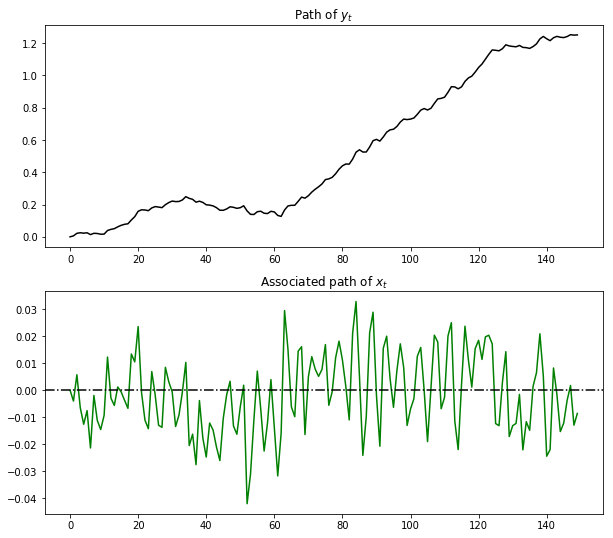

In [3]:
ϕ_1, ϕ_2, ϕ_3, ϕ_4 = 0.5, -0.2, 0, 0.5
σ = 0.01
ν = 0.01   # Growth rate

# A matrix should be n x n
A = np.array([[ϕ_1, ϕ_2, ϕ_3, ϕ_4],
              [  1,   0,   0,   0],
              [  0,   1,   0,   0],
              [  0,   0,   1,   0]])

# B matrix should be n x k
B = np.array([[σ, 0, 0, 0]]).T

D = np.array([1, 0, 0, 0]) @ A
F = np.array([1, 0, 0, 0]) @ B

amf = AMF_LSS_VAR(A, B, D, F, ν=ν)

T = 150
x, y = amf.lss.simulate(T)

fig, ax = plt.subplots(2, 1, figsize=(10, 9))

ax[0].plot(np.arange(T), y[amf.nx, :], color='k')
ax[0].set_title('Path of $y_t$')
ax[1].plot(np.arange(T), y[0, :], color='g')
ax[1].axhline(0, color='k', linestyle='-.')
ax[1].set_title('Associated path of $x_t$')
plt.show()



D:\programs\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1920: RuntimeWarning: invalid value encountered in multiply
  lower_bound = self.a * scale + loc
D:\programs\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1921: RuntimeWarning: invalid value encountered in multiply
  upper_bound = self.b * scale + loc


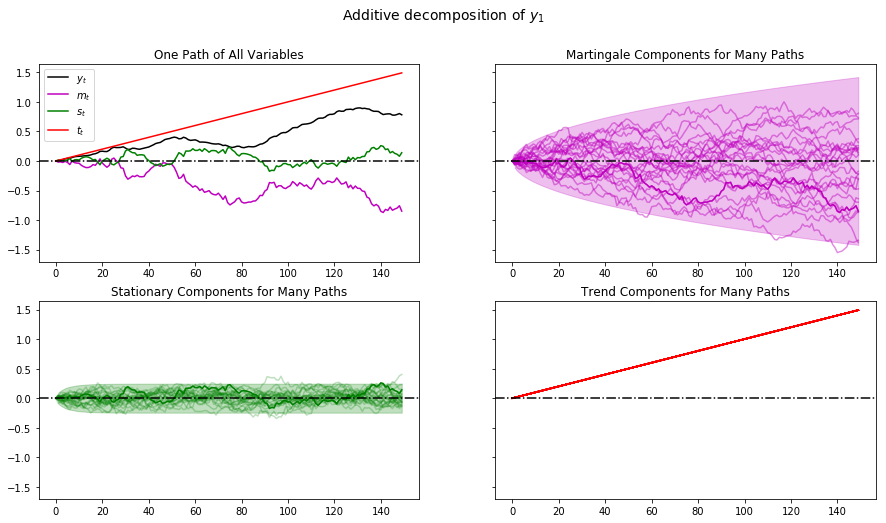

In [4]:
amf.plot_additive(T)
plt.show()

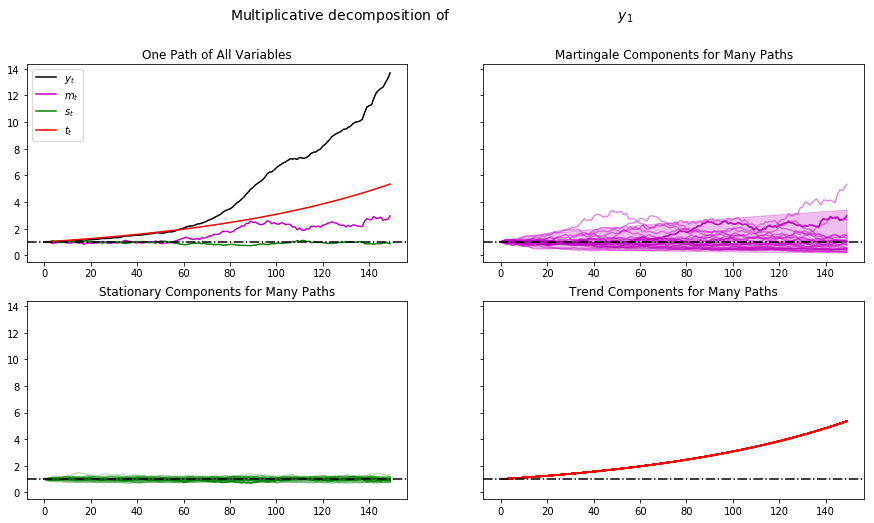

In [5]:
amf.plot_multiplicative(T)
plt.show()

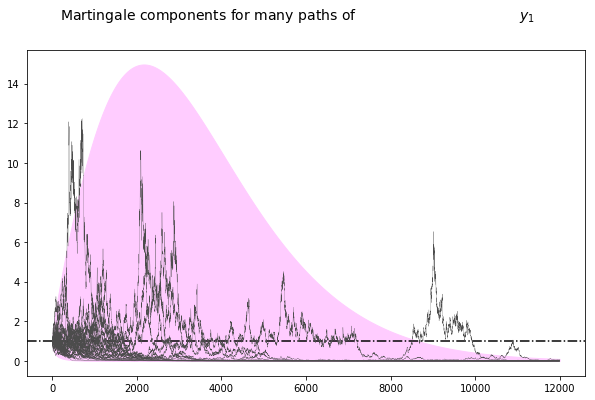

In [6]:
np.random.seed(10021987)
amf.plot_martingales(12000)
plt.show()

In [7]:
"""

@authors: Chase Coleman, Balint Skoze, Tom Sargent

"""

class AMF_LSS_VAR:
    """
    This class is written to transform a scalar additive functional
    into a linear state space system.
    """
    def __init__(self, A, B, D, F=0.0, ν=0.0):
        # Unpack required elements
        self.A, self.B, self.D, self.F, self.ν = A, B, D, F, ν

        # Create space for additive decomposition
        self.add_decomp = None
        self.mult_decomp = None

        # Construct BIG state space representation
        self.lss = self.construct_ss()

    def construct_ss(self):
        """
        This creates the state space representation that can be passed
        into the quantecon LSS class.
        """
        # Pull out useful info
        A, B, D, F, ν = self.A, self.B, self.D, self.F, self.ν
        nx, nk, nm = 1, 1, 1
        if self.add_decomp:
            ν, H, g = self.add_decomp
        else:
            ν, H, g = self.additive_decomp()

        # Build A matrix for LSS
        # Order of states is: [1, t, xt, yt, mt]
        A1 = np.hstack([1, 0, 0, 0, 0])       # Transition for 1
        A2 = np.hstack([1, 1, 0, 0, 0])       # Transition for t
        A3 = np.hstack([0, 0, A, 0, 0])       # Transition for x_{t+1}
        A4 = np.hstack([ν, 0, D, 1, 0])       # Transition for y_{t+1}
        A5 = np.hstack([0, 0, 0, 0, 1])       # Transition for m_{t+1}
        Abar = np.vstack([A1, A2, A3, A4, A5])

        # Build B matrix for LSS
        Bbar = np.vstack([0, 0, B, F, H])

        # Build G matrix for LSS
        # Order of observation is: [xt, yt, mt, st, tt]
        G1 = np.hstack([0, 0, 1, 0, 0])            # Selector for x_{t}
        G2 = np.hstack([0, 0, 0, 1, 0])            # Selector for y_{t}
        G3 = np.hstack([0, 0, 0, 0, 1])            # Selector for martingale
        G4 = np.hstack([0, 0, -g, 0, 0])           # Selector for stationary
        G5 = np.hstack([0, ν, 0, 0, 0])            # Selector for trend
        Gbar = np.vstack([G1, G2, G3, G4, G5])

        # Build H matrix for LSS
        Hbar = np.zeros((1, 1))

        # Build LSS type
        x0 = np.hstack([1, 0, 0, 0, 0])
        S0 = np.zeros((5, 5))
        lss = qe.lss.LinearStateSpace(Abar, Bbar, Gbar, Hbar,
                                      mu_0=x0, Sigma_0=S0)

        return lss

    def additive_decomp(self):
        """
        Return values for the martingale decomposition (Proposition 4.3.3.)
           - ν     : unconditional mean difference in Y
           - H     : coefficient for the (linear) martingale component (kappa_a)
           - g     : coefficient for the stationary component g(x)
           - Y_0   : it should be the function of X_0 (for now set it to 0.0)
        """
        A_res = 1 / (1 - self.A)
        g = self.D * A_res
        H = self.F + self.D * A_res * self.B

        return self.ν, H, g

    def multiplicative_decomp(self):
        """
        Return values for the multiplicative decomposition (Example 5.4.4.)
            - ν_tilde  : eigenvalue
            - H        : vector for the Jensen term
        """
        ν, H, g = self.additive_decomp()
        ν_tilde = ν + (.5) * H**2

        return ν_tilde, H, g

    def loglikelihood_path(self, x, y):
        A, B, D, F = self.A, self.B, self.D, self.F
        T = y.T.size
        FF = F**2
        FFinv = 1 / FF
        temp = y[1:] - y[:-1] - D * x[:-1]
        obs = temp * FFinv * temp
        obssum = np.cumsum(obs)
        scalar = (np.log(FF) + np.log(2 * np.pi)) * np.arange(1, T)

        return (-0.5) * (obssum + scalar)

    def loglikelihood(self, x, y):
        llh = self.loglikelihood_path(x, y)

        return llh[-1]

In [8]:
def simulate_xy(amf, T):
    "Simulate individual paths."
    foo, bar = amf.lss.simulate(T)
    x = bar[0, :]
    y = bar[1, :]

    return x, y

def simulate_paths(amf, T=150, I=5000):
    "Simulate multiple independent paths."

    # Allocate space
    storeX = np.empty((I, T))
    storeY = np.empty((I, T))

    for i in range(I):
        # Do specific simulation
        x, y = simulate_xy(amf, T)

        # Fill in our storage matrices
        storeX[i, :] = x
        storeY[i, :] = y

    return storeX, storeY

def population_means(amf, T=150):
    # Allocate Space
    xmean = np.empty(T)
    ymean = np.empty(T)

    # Pull out moment generator
    moment_generator = amf.lss.moment_sequence()

    for tt in range (T):
        tmoms = next(moment_generator)
        ymeans = tmoms[1]
        xmean[tt] = ymeans[0]
        ymean[tt] = ymeans[1]

    return xmean, ymean

In [9]:
def simulate_martingale_components(amf, T=1000, I=5000):
    # Get the multiplicative decomposition
    ν, H, g = amf.multiplicative_decomp()

    # Allocate space
    add_mart_comp = np.empty((I, T))

    # Simulate and pull out additive martingale component
    for i in range(I):
        foo, bar = amf.lss.simulate(T)

        # Martingale component is third component
        add_mart_comp[i, :] = bar[2, :]

    mul_mart_comp = np.exp(add_mart_comp - (np.arange(T) * H**2)/2)

    return add_mart_comp, mul_mart_comp


# Build model
amf_2 = AMF_LSS_VAR(0.8, 0.001, 1.0, 0.01,.005)

amc, mmc = simulate_martingale_components(amf_2, 1000, 5000)

amcT = amc[:, -1]
mmcT = mmc[:, -1]

print("The (min, mean, max) of additive Martingale component in period T is")
print(f"\t ({np.min(amcT)}, {np.mean(amcT)}, {np.max(amcT)})")

print("The (min, mean, max) of multiplicative Martingale component \
in period T is")
print(f"\t ({np.min(mmcT)}, {np.mean(mmcT)}, {np.max(mmcT)})")

The (min, mean, max) of additive Martingale component in period T is
	 (-1.8379907335579106, 0.011040789361757434, 1.4697384727035145)
The (min, mean, max) of multiplicative Martingale component in period T is
	 (0.14222026893384476, 1.006753060146832, 3.8858858377907133)


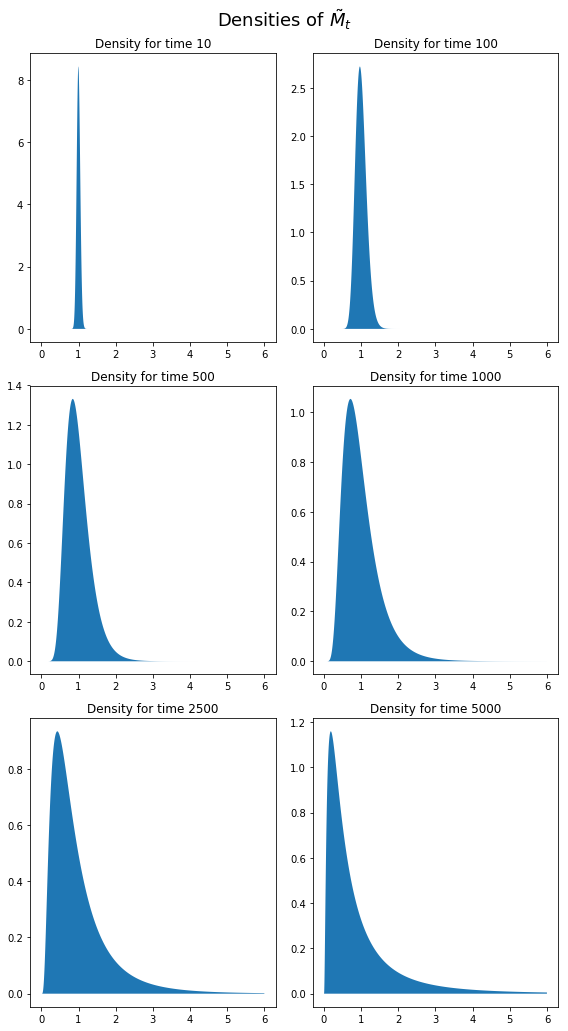

In [10]:
def Mtilde_t_density(amf, t, xmin=1e-8, xmax=5.0, npts=5000):

    # Pull out the multiplicative decomposition
    νtilde, H, g = amf.multiplicative_decomp()
    H2 = H*H

    # The distribution
    mdist = lognorm(np.sqrt(t*H2), scale=np.exp(-t*H2/2))
    x = np.linspace(xmin, xmax, npts)
    pdf = mdist.pdf(x)

    return x, pdf


def logMtilde_t_density(amf, t, xmin=-15.0, xmax=15.0, npts=5000):

    # Pull out the multiplicative decomposition
    νtilde, H, g = amf.multiplicative_decomp()
    H2 = H*H

    # The distribution
    lmdist = norm(-t*H2/2, np.sqrt(t*H2))
    x = np.linspace(xmin, xmax, npts)
    pdf = lmdist.pdf(x)

    return x, pdf


times_to_plot = [10, 100, 500, 1000, 2500, 5000]
dens_to_plot = map(lambda t: Mtilde_t_density(amf_2, t, xmin=1e-8, xmax=6.0),
                   times_to_plot)
ldens_to_plot = map(lambda t: logMtilde_t_density(amf_2, t, xmin=-10.0,
                    xmax=10.0), times_to_plot)

fig, ax = plt.subplots(3, 2, figsize=(8, 14))
ax = ax.flatten()

fig.suptitle(r"Densities of $\tilde{M}_t$", fontsize=18, y=1.02)
for (it, dens_t) in enumerate(dens_to_plot):
    x, pdf = dens_t
    ax[it].set_title(f"Density for time {times_to_plot[it]}")
    ax[it].fill_between(x, np.zeros_like(pdf), pdf)

plt.tight_layout()
plt.show()

#### Lesson: Classical Control with Linear Algebra

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
"""

Authors: Balint Skoze, Tom Sargent, John Stachurski

"""

import numpy as np
import scipy.stats as spst
import scipy.linalg as la

class LQFilter:

    def __init__(self, d, h, y_m, r=None, h_eps=None, β=None):
        """

        Parameters
        ----------
            d : list or numpy.array (1-D or a 2-D column vector)
                    The order of the coefficients: [d_0, d_1, ..., d_m]
            h : scalar
                    Parameter of the objective function (corresponding to the
                    quadratic term)
            y_m : list or numpy.array (1-D or a 2-D column vector)
                    Initial conditions for y
            r : list or numpy.array (1-D or a 2-D column vector)
                    The order of the coefficients: [r_0, r_1, ..., r_k]
                    (optional, if not defined -> deterministic problem)
            β : scalar
                    Discount factor (optional, default value is one)
        """

        self.h = h
        self.d = np.asarray(d)
        self.m = self.d.shape[0] - 1

        self.y_m = np.asarray(y_m)

        if self.m == self.y_m.shape[0]:
            self.y_m = self.y_m.reshape(self.m, 1)
        else:
            raise ValueError("y_m must be of length m = {self.m:d}")

        #---------------------------------------------
        # Define the coefficients of ϕ upfront
        #---------------------------------------------
        ϕ = np.zeros(2 * self.m + 1)
        for i in range(- self.m, self.m + 1):
            ϕ[self.m - i] = np.sum(np.diag(self.d.reshape(self.m + 1, 1) \
                                           @ self.d.reshape(1, self.m + 1),
                                           k=-i
                                           )
                                    )
        ϕ[self.m] = ϕ[self.m] + self.h
        self.ϕ = ϕ

        #-----------------------------------------------------
        # If r is given calculate the vector ϕ_r
        #-----------------------------------------------------
        if r is None:
            pass
        else:
            self.r = np.asarray(r)
            self.k = self.r.shape[0] - 1
            ϕ_r = np.zeros(2 * self.k + 1)
            for i in range(- self.k, self.k + 1):
                ϕ_r[self.k - i] = np.sum(np.diag(self.r.reshape(self.k + 1, 1) \
                                                 @ self.r.reshape(1, self.k + 1),
                                                 k=-i
                                                 )
                                        )
            if h_eps is None:
                self.ϕ_r = ϕ_r
            else:
                ϕ_r[self.k] = ϕ_r[self.k] + h_eps
                self.ϕ_r = ϕ_r

        #-----------------------------------------------------
        # If β is given, define the transformed variables
        #-----------------------------------------------------
        if β is None:
            self.β = 1
        else:
            self.β = β
            self.d = self.β**(np.arange(self.m + 1)/2) * self.d
            self.y_m = self.y_m * (self.β**(- np.arange(1, self.m + 1)/2)) \
                                   .reshape(self.m, 1)

    def construct_W_and_Wm(self, N):
        """
        This constructs the matrices W and W_m for a given number of periods N
        """

        m = self.m
        d = self.d

        W = np.zeros((N + 1, N + 1))
        W_m = np.zeros((N + 1, m))

        #---------------------------------------
        # Terminal conditions
        #---------------------------------------

        D_m1 = np.zeros((m + 1, m + 1))
        M = np.zeros((m + 1, m))

        # (1) Constuct the D_{m+1} matrix using the formula

        for j in range(m + 1):
            for k in range(j, m + 1):
                D_m1[j, k] = d[:j + 1] @ d[k - j: k + 1]

        # Make the matrix symmetric
        D_m1 = D_m1 + D_m1.T - np.diag(np.diag(D_m1))

        # (2) Construct the M matrix using the entries of D_m1

        for j in range(m):
            for i in range(j + 1, m + 1):
                M[i, j] = D_m1[i - j - 1, m]

        #----------------------------------------------
        # Euler equations for t = 0, 1, ..., N-(m+1)
        #----------------------------------------------
        ϕ = self.ϕ

        W[:(m + 1), :(m + 1)] = D_m1 + self.h * np.eye(m + 1)
        W[:(m + 1), (m + 1):(2 * m + 1)] = M

        for i, row in enumerate(np.arange(m + 1, N + 1 - m)):
            W[row, (i + 1):(2 * m + 2 + i)] = ϕ

        for i in range(1, m + 1):
            W[N - m + i, -(2 * m + 1 - i):] = ϕ[:-i]

        for i in range(m):
            W_m[N - i, :(m - i)] = ϕ[(m + 1 + i):]

        return W, W_m

    def roots_of_characteristic(self):
        """
        This function calculates z_0 and the 2m roots of the characteristic
        equation associated with the Euler equation (1.7)

        Note:
        ------
        numpy.poly1d(roots, True) defines a polynomial using its roots that can
        be evaluated at any point. If x_1, x_2, ... , x_m are the roots then
            p(x) = (x - x_1)(x - x_2)...(x - x_m)
        """
        m = self.m
        ϕ = self.ϕ

        # Calculate the roots of the 2m-polynomial
        roots = np.roots(ϕ)
        # Sort the roots according to their length (in descending order)
        roots_sorted = roots[np.argsort(abs(roots))[::-1]]

        z_0 = ϕ.sum() / np.poly1d(roots, True)(1)
        z_1_to_m = roots_sorted[:m]     # We need only those outside the unit circle

        λ = 1 / z_1_to_m

        return z_1_to_m, z_0, λ

    def coeffs_of_c(self):
        '''
        This function computes the coefficients {c_j, j = 0, 1, ..., m} for
                c(z) = sum_{j = 0}^{m} c_j z^j

        Based on the expression (1.9). The order is
            c_coeffs = [c_0, c_1, ..., c_{m-1}, c_m]
        '''
        z_1_to_m, z_0 = self.roots_of_characteristic()[:2]

        c_0 = (z_0 * np.prod(z_1_to_m).real * (- 1)**self.m)**(.5)
        c_coeffs = np.poly1d(z_1_to_m, True).c * z_0 / c_0

        return c_coeffs[::-1]

    def solution(self):
        """
        This function calculates {λ_j, j=1,...,m} and {A_j, j=1,...,m}
        of the expression (1.15)
        """
        λ = self.roots_of_characteristic()[2]
        c_0 = self.coeffs_of_c()[-1]

        A = np.zeros(self.m, dtype=complex)
        for j in range(self.m):
            denom = 1 - λ/λ[j]
            A[j] = c_0**(-2) / np.prod(denom[np.arange(self.m) != j])

        return λ, A

    def construct_V(self, N):
        '''
        This function constructs the covariance matrix for x^N (see section 6)
        for a given period N
        '''
        V = np.zeros((N, N))
        ϕ_r = self.ϕ_r

        for i in range(N):
            for j in range(N):
                if abs(i-j) <= self.k:
                    V[i, j] = ϕ_r[self.k + abs(i-j)]

        return V

    def simulate_a(self, N):
        """
        Assuming that the u's are normal, this method draws a random path
        for x^N
        """
        V = self.construct_V(N + 1)
        d = spst.multivariate_normal(np.zeros(N + 1), V)

        return d.rvs()

    def predict(self, a_hist, t):
        """
        This function implements the prediction formula discussed in section 6 (1.59)
        It takes a realization for a^N, and the period in which the prediction is 
        formed

        Output:  E[abar | a_t, a_{t-1}, ..., a_1, a_0]
        """

        N = np.asarray(a_hist).shape[0] - 1
        a_hist = np.asarray(a_hist).reshape(N + 1, 1)
        V = self.construct_V(N + 1)

        aux_matrix = np.zeros((N + 1, N + 1))
        aux_matrix[:(t + 1), :(t + 1)] = np.eye(t + 1)
        L = la.cholesky(V).T
        Ea_hist = la.inv(L) @ aux_matrix @ L @ a_hist

        return Ea_hist

    def optimal_y(self, a_hist, t=None):
        """
        - if t is NOT given it takes a_hist (list or numpy.array) as a
          deterministic a_t
        - if t is given, it solves the combined control prediction problem 
          (section 7)(by default, t == None -> deterministic)

        for a given sequence of a_t (either deterministic or a particular
        realization), it calculates the optimal y_t sequence using the method
        of the lecture

        Note:
        ------
        scipy.linalg.lu normalizes L, U so that L has unit diagonal elements
        To make things consistent with the lecture, we need an auxiliary
        diagonal matrix D which renormalizes L and U
        """

        N = np.asarray(a_hist).shape[0] - 1
        W, W_m = self.construct_W_and_Wm(N)

        L, U = la.lu(W, permute_l=True)
        D = np.diag(1 / np.diag(U))
        U = D @ U
        L = L @ np.diag(1 / np.diag(D))

        J = np.fliplr(np.eye(N + 1))

        if t is None:   # If the problem is deterministic

            a_hist = J @ np.asarray(a_hist).reshape(N + 1, 1)

            #--------------------------------------------
            # Transform the 'a' sequence if β is given
            #--------------------------------------------
            if self.β != 1:
                a_hist =  a_hist * (self.β**(np.arange(N + 1) / 2))[::-1] \
                                    .reshape(N + 1, 1)

            a_bar = a_hist - W_m @ self.y_m            # a_bar from the lecture
            Uy = np.linalg.solve(L, a_bar)             # U @ y_bar = L^{-1}
            y_bar = np.linalg.solve(U, Uy)             # y_bar = U^{-1}L^{-1}

            # Reverse the order of y_bar with the matrix J
            J = np.fliplr(np.eye(N + self.m + 1))
            # y_hist : concatenated y_m and y_bar
            y_hist = J @ np.vstack([y_bar, self.y_m])

            #--------------------------------------------
            # Transform the optimal sequence back if β is given
            #--------------------------------------------
            if self.β != 1:
                y_hist = y_hist * (self.β**(- np.arange(-self.m, N + 1)/2)) \
                                    .reshape(N + 1 + self.m, 1)

            return y_hist, L, U, y_bar

        else:           # If the problem is stochastic and we look at it

            Ea_hist = self.predict(a_hist, t).reshape(N + 1, 1)
            Ea_hist = J @ Ea_hist

            a_bar = Ea_hist - W_m @ self.y_m           # a_bar from the lecture
            Uy = np.linalg.solve(L, a_bar)             # U @ y_bar = L^{-1}
            y_bar = np.linalg.solve(U, Uy)             # y_bar = U^{-1}L^{-1}

            # Reverse the order of y_bar with the matrix J
            J = np.fliplr(np.eye(N + self.m + 1))
            # y_hist : concatenated y_m and y_bar
            y_hist = J @ np.vstack([y_bar, self.y_m])

            return y_hist, L, U, y_bar

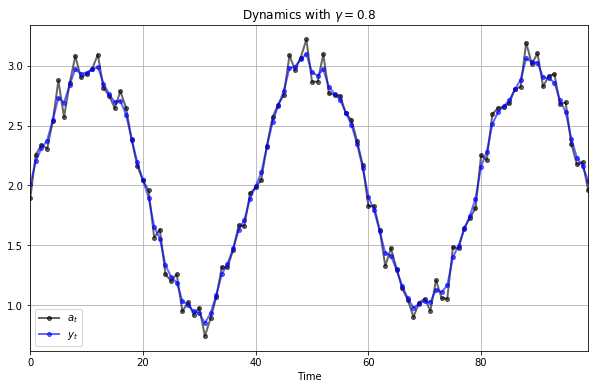

In [3]:
# Set seed and generate a_t sequence
np.random.seed(123)
n = 100
a_seq = np.sin(np.linspace(0, 5 * np.pi, n)) + 2 + 0.1 * np.random.randn(n)

def plot_simulation(γ=0.8, m=1, h=1, y_m=2):

    d = γ * np.asarray([1, -1])
    y_m = np.asarray(y_m).reshape(m, 1)

    testlq = LQFilter(d, h, y_m)
    y_hist, L, U, y = testlq.optimal_y(a_seq)
    y = y[::-1]  # Reverse y

    # Plot simulation results

    fig, ax = plt.subplots(figsize=(10, 6))
    p_args = {'lw' : 2, 'alpha' : 0.6}
    time = range(len(y))
    ax.plot(time, a_seq / h, 'k-o', ms=4, lw=2, alpha=0.6, label='$a_t$')
    ax.plot(time, y, 'b-o', ms=4, lw=2, alpha=0.6, label='$y_t$')
    ax.set(title=rf'Dynamics with $\gamma = {γ}$',
           xlabel='Time',
           xlim=(0, max(time))
          )
    ax.legend()
    ax.grid()
    plt.show()

plot_simulation()

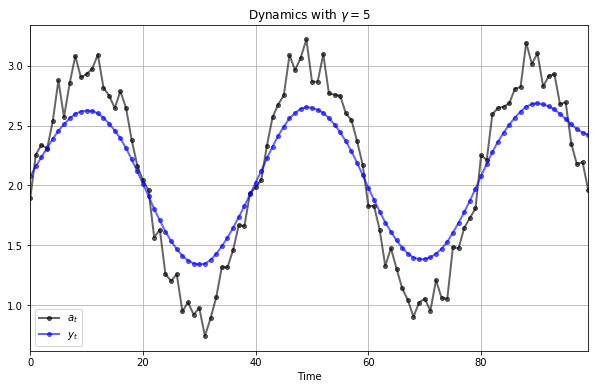

In [4]:
plot_simulation(γ=5)



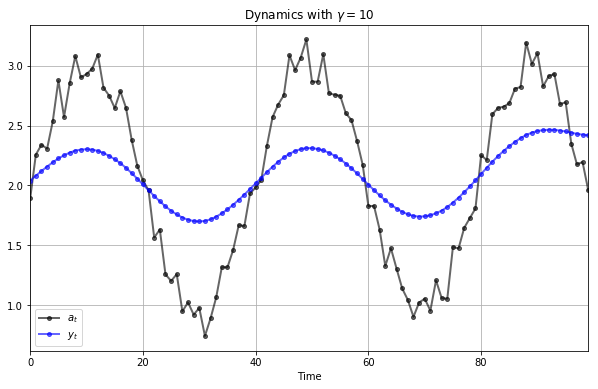

In [5]:
plot_simulation(γ=10)

#### Lesson: Classical Prediction and Filtering With Linear Algebra

In [6]:
import numpy as np

In [7]:
"""

Authors: Balint Skoze, Tom Sargent, John Stachurski

"""

import numpy as np
import scipy.stats as spst
import scipy.linalg as la

class LQFilter:

    def __init__(self, d, h, y_m, r=None, h_eps=None, β=None):
        """

        Parameters
        ----------
            d : list or numpy.array (1-D or a 2-D column vector)
                    The order of the coefficients: [d_0, d_1, ..., d_m]
            h : scalar
                    Parameter of the objective function (corresponding to the
                    quadratic term)
            y_m : list or numpy.array (1-D or a 2-D column vector)
                    Initial conditions for y
            r : list or numpy.array (1-D or a 2-D column vector)
                    The order of the coefficients: [r_0, r_1, ..., r_k]
                    (optional, if not defined -> deterministic problem)
            β : scalar
                    Discount factor (optional, default value is one)
        """

        self.h = h
        self.d = np.asarray(d)
        self.m = self.d.shape[0] - 1

        self.y_m = np.asarray(y_m)

        if self.m == self.y_m.shape[0]:
            self.y_m = self.y_m.reshape(self.m, 1)
        else:
            raise ValueError("y_m must be of length m = {self.m:d}")

        #---------------------------------------------
        # Define the coefficients of ϕ upfront
        #---------------------------------------------
        ϕ = np.zeros(2 * self.m + 1)
        for i in range(- self.m, self.m + 1):
            ϕ[self.m - i] = np.sum(np.diag(self.d.reshape(self.m + 1, 1) \
                                           @ self.d.reshape(1, self.m + 1),
                                           k=-i
                                           )
                                    )
        ϕ[self.m] = ϕ[self.m] + self.h
        self.ϕ = ϕ

        #-----------------------------------------------------
        # If r is given calculate the vector ϕ_r
        #-----------------------------------------------------
        if r is None:
            pass
        else:
            self.r = np.asarray(r)
            self.k = self.r.shape[0] - 1
            ϕ_r = np.zeros(2 * self.k + 1)
            for i in range(- self.k, self.k + 1):
                ϕ_r[self.k - i] = np.sum(np.diag(self.r.reshape(self.k + 1, 1) \
                                                 @ self.r.reshape(1, self.k + 1),
                                                 k=-i
                                                 )
                                        )
            if h_eps is None:
                self.ϕ_r = ϕ_r
            else:
                ϕ_r[self.k] = ϕ_r[self.k] + h_eps
                self.ϕ_r = ϕ_r

        #-----------------------------------------------------
        # If β is given, define the transformed variables
        #-----------------------------------------------------
        if β is None:
            self.β = 1
        else:
            self.β = β
            self.d = self.β**(np.arange(self.m + 1)/2) * self.d
            self.y_m = self.y_m * (self.β**(- np.arange(1, self.m + 1)/2)) \
                                   .reshape(self.m, 1)

    def construct_W_and_Wm(self, N):
        """
        This constructs the matrices W and W_m for a given number of periods N
        """

        m = self.m
        d = self.d

        W = np.zeros((N + 1, N + 1))
        W_m = np.zeros((N + 1, m))

        #---------------------------------------
        # Terminal conditions
        #---------------------------------------

        D_m1 = np.zeros((m + 1, m + 1))
        M = np.zeros((m + 1, m))

        # (1) Constuct the D_{m+1} matrix using the formula

        for j in range(m + 1):
            for k in range(j, m + 1):
                D_m1[j, k] = d[:j + 1] @ d[k - j: k + 1]

        # Make the matrix symmetric
        D_m1 = D_m1 + D_m1.T - np.diag(np.diag(D_m1))

        # (2) Construct the M matrix using the entries of D_m1

        for j in range(m):
            for i in range(j + 1, m + 1):
                M[i, j] = D_m1[i - j - 1, m]

        #----------------------------------------------
        # Euler equations for t = 0, 1, ..., N-(m+1)
        #----------------------------------------------
        ϕ = self.ϕ

        W[:(m + 1), :(m + 1)] = D_m1 + self.h * np.eye(m + 1)
        W[:(m + 1), (m + 1):(2 * m + 1)] = M

        for i, row in enumerate(np.arange(m + 1, N + 1 - m)):
            W[row, (i + 1):(2 * m + 2 + i)] = ϕ

        for i in range(1, m + 1):
            W[N - m + i, -(2 * m + 1 - i):] = ϕ[:-i]

        for i in range(m):
            W_m[N - i, :(m - i)] = ϕ[(m + 1 + i):]

        return W, W_m

    def roots_of_characteristic(self):
        """
        This function calculates z_0 and the 2m roots of the characteristic
        equation associated with the Euler equation (1.7)

        Note:
        ------
        numpy.poly1d(roots, True) defines a polynomial using its roots that can
        be evaluated at any point. If x_1, x_2, ... , x_m are the roots then
            p(x) = (x - x_1)(x - x_2)...(x - x_m)
        """
        m = self.m
        ϕ = self.ϕ

        # Calculate the roots of the 2m-polynomial
        roots = np.roots(ϕ)
        # Sort the roots according to their length (in descending order)
        roots_sorted = roots[np.argsort(abs(roots))[::-1]]

        z_0 = ϕ.sum() / np.poly1d(roots, True)(1)
        z_1_to_m = roots_sorted[:m]     # We need only those outside the unit circle

        λ = 1 / z_1_to_m

        return z_1_to_m, z_0, λ

    def coeffs_of_c(self):
        '''
        This function computes the coefficients {c_j, j = 0, 1, ..., m} for
                c(z) = sum_{j = 0}^{m} c_j z^j

        Based on the expression (1.9). The order is
            c_coeffs = [c_0, c_1, ..., c_{m-1}, c_m]
        '''
        z_1_to_m, z_0 = self.roots_of_characteristic()[:2]

        c_0 = (z_0 * np.prod(z_1_to_m).real * (- 1)**self.m)**(.5)
        c_coeffs = np.poly1d(z_1_to_m, True).c * z_0 / c_0

        return c_coeffs[::-1]

    def solution(self):
        """
        This function calculates {λ_j, j=1,...,m} and {A_j, j=1,...,m}
        of the expression (1.15)
        """
        λ = self.roots_of_characteristic()[2]
        c_0 = self.coeffs_of_c()[-1]

        A = np.zeros(self.m, dtype=complex)
        for j in range(self.m):
            denom = 1 - λ/λ[j]
            A[j] = c_0**(-2) / np.prod(denom[np.arange(self.m) != j])

        return λ, A

    def construct_V(self, N):
        '''
        This function constructs the covariance matrix for x^N (see section 6)
        for a given period N
        '''
        V = np.zeros((N, N))
        ϕ_r = self.ϕ_r

        for i in range(N):
            for j in range(N):
                if abs(i-j) <= self.k:
                    V[i, j] = ϕ_r[self.k + abs(i-j)]

        return V

    def simulate_a(self, N):
        """
        Assuming that the u's are normal, this method draws a random path
        for x^N
        """
        V = self.construct_V(N + 1)
        d = spst.multivariate_normal(np.zeros(N + 1), V)

        return d.rvs()

    def predict(self, a_hist, t):
        """
        This function implements the prediction formula discussed in section 6 (1.59)
        It takes a realization for a^N, and the period in which the prediction is 
        formed

        Output:  E[abar | a_t, a_{t-1}, ..., a_1, a_0]
        """

        N = np.asarray(a_hist).shape[0] - 1
        a_hist = np.asarray(a_hist).reshape(N + 1, 1)
        V = self.construct_V(N + 1)

        aux_matrix = np.zeros((N + 1, N + 1))
        aux_matrix[:(t + 1), :(t + 1)] = np.eye(t + 1)
        L = la.cholesky(V).T
        Ea_hist = la.inv(L) @ aux_matrix @ L @ a_hist

        return Ea_hist

    def optimal_y(self, a_hist, t=None):
        """
        - if t is NOT given it takes a_hist (list or numpy.array) as a
          deterministic a_t
        - if t is given, it solves the combined control prediction problem 
          (section 7)(by default, t == None -> deterministic)

        for a given sequence of a_t (either deterministic or a particular
        realization), it calculates the optimal y_t sequence using the method
        of the lecture

        Note:
        ------
        scipy.linalg.lu normalizes L, U so that L has unit diagonal elements
        To make things consistent with the lecture, we need an auxiliary
        diagonal matrix D which renormalizes L and U
        """

        N = np.asarray(a_hist).shape[0] - 1
        W, W_m = self.construct_W_and_Wm(N)

        L, U = la.lu(W, permute_l=True)
        D = np.diag(1 / np.diag(U))
        U = D @ U
        L = L @ np.diag(1 / np.diag(D))

        J = np.fliplr(np.eye(N + 1))

        if t is None:   # If the problem is deterministic

            a_hist = J @ np.asarray(a_hist).reshape(N + 1, 1)

            #--------------------------------------------
            # Transform the 'a' sequence if β is given
            #--------------------------------------------
            if self.β != 1:
                a_hist =  a_hist * (self.β**(np.arange(N + 1) / 2))[::-1] \
                                    .reshape(N + 1, 1)

            a_bar = a_hist - W_m @ self.y_m            # a_bar from the lecture
            Uy = np.linalg.solve(L, a_bar)             # U @ y_bar = L^{-1}
            y_bar = np.linalg.solve(U, Uy)             # y_bar = U^{-1}L^{-1}

            # Reverse the order of y_bar with the matrix J
            J = np.fliplr(np.eye(N + self.m + 1))
            # y_hist : concatenated y_m and y_bar
            y_hist = J @ np.vstack([y_bar, self.y_m])

            #--------------------------------------------
            # Transform the optimal sequence back if β is given
            #--------------------------------------------
            if self.β != 1:
                y_hist = y_hist * (self.β**(- np.arange(-self.m, N + 1)/2)) \
                                    .reshape(N + 1 + self.m, 1)

            return y_hist, L, U, y_bar

        else:           # If the problem is stochastic and we look at it

            Ea_hist = self.predict(a_hist, t).reshape(N + 1, 1)
            Ea_hist = J @ Ea_hist

            a_bar = Ea_hist - W_m @ self.y_m           # a_bar from the lecture
            Uy = np.linalg.solve(L, a_bar)             # U @ y_bar = L^{-1}
            y_bar = np.linalg.solve(U, Uy)             # y_bar = U^{-1}L^{-1}

            # Reverse the order of y_bar with the matrix J
            J = np.fliplr(np.eye(N + self.m + 1))
            # y_hist : concatenated y_m and y_bar
            y_hist = J @ np.vstack([y_bar, self.y_m])

            return y_hist, L, U, y_bar

In [8]:
m = 1
y_m = np.asarray([.0]).reshape(m, 1)
d = np.asarray([1, -2])
r = np.asarray([1, -2])
h = 0.0
example = LQFilter(d, h, y_m, r=d)

In [9]:
example.coeffs_of_c()

array([ 2., -1.])

In [10]:
example.roots_of_characteristic()

(array([2.]), -2.0, array([0.5]))

In [11]:
V = example.construct_V(N=5)
print(V)

[[ 5. -2.  0.  0.  0.]
 [-2.  5. -2.  0.  0.]
 [ 0. -2.  5. -2.  0.]
 [ 0.  0. -2.  5. -2.]
 [ 0.  0.  0. -2.  5.]]


In [12]:
Li = np.linalg.cholesky(V)
print(Li)

[[ 2.23606798  0.          0.          0.          0.        ]
 [-0.89442719  2.04939015  0.          0.          0.        ]
 [ 0.         -0.97590007  2.01186954  0.          0.        ]
 [ 0.          0.         -0.99410024  2.00293902  0.        ]
 [ 0.          0.          0.         -0.99853265  2.000733  ]]


In [13]:
L = np.linalg.inv(Li)
print(L)

[[ 0.4472136   0.          0.          0.          0.        ]
 [ 0.19518001  0.48795004  0.          0.          0.        ]
 [ 0.09467621  0.23669053  0.49705012  0.          0.        ]
 [ 0.04698977  0.11747443  0.2466963   0.49926632 -0.        ]
 [ 0.02345182  0.05862954  0.12312203  0.24917554  0.49981682]]


In [14]:
m = 2
y_m = np.asarray([.0, .0]).reshape(m, 1)
d = np.asarray([1, 0, -np.sqrt(2)])
r = np.asarray([1, 0, -np.sqrt(2)])
h = 0.0
example = LQFilter(d, h, y_m, r=d)
example.coeffs_of_c()

array([ 1.41421356, -0.        , -1.        ])

In [15]:
example.roots_of_characteristic()

(array([ 1.18920712, -1.18920712]),
 -1.4142135623731122,
 array([ 0.84089642, -0.84089642]))

In [16]:
V = example.construct_V(N=8)
print(V)

[[ 3.          0.         -1.41421356  0.          0.          0.
   0.          0.        ]
 [ 0.          3.          0.         -1.41421356  0.          0.
   0.          0.        ]
 [-1.41421356  0.          3.          0.         -1.41421356  0.
   0.          0.        ]
 [ 0.         -1.41421356  0.          3.          0.         -1.41421356
   0.          0.        ]
 [ 0.          0.         -1.41421356  0.          3.          0.
  -1.41421356  0.        ]
 [ 0.          0.          0.         -1.41421356  0.          3.
   0.         -1.41421356]
 [ 0.          0.          0.          0.         -1.41421356  0.
   3.          0.        ]
 [ 0.          0.          0.          0.          0.         -1.41421356
   0.          3.        ]]


In [17]:
Li = np.linalg.cholesky(V)
print(Li[-3:, :])

[[ 0.          0.          0.         -0.9258201   0.          1.46385011
   0.          0.        ]
 [ 0.          0.          0.          0.         -0.96609178  0.
   1.43759058  0.        ]
 [ 0.          0.          0.          0.          0.         -0.96609178
   0.          1.43759058]]


In [18]:
L = np.linalg.inv(Li)
print(L)

[[0.57735027 0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.57735027 0.         0.         0.         0.
  0.         0.        ]
 [0.3086067  0.         0.65465367 0.         0.         0.
  0.         0.        ]
 [0.         0.3086067  0.         0.65465367 0.         0.
  0.         0.        ]
 [0.19518001 0.         0.41403934 0.         0.68313005 0.
  0.         0.        ]
 [0.         0.19518001 0.         0.41403934 0.         0.68313005
  0.         0.        ]
 [0.13116517 0.         0.27824334 0.         0.45907809 0.
  0.69560834 0.        ]
 [0.         0.13116517 0.         0.27824334 0.         0.45907809
  0.         0.69560834]]
